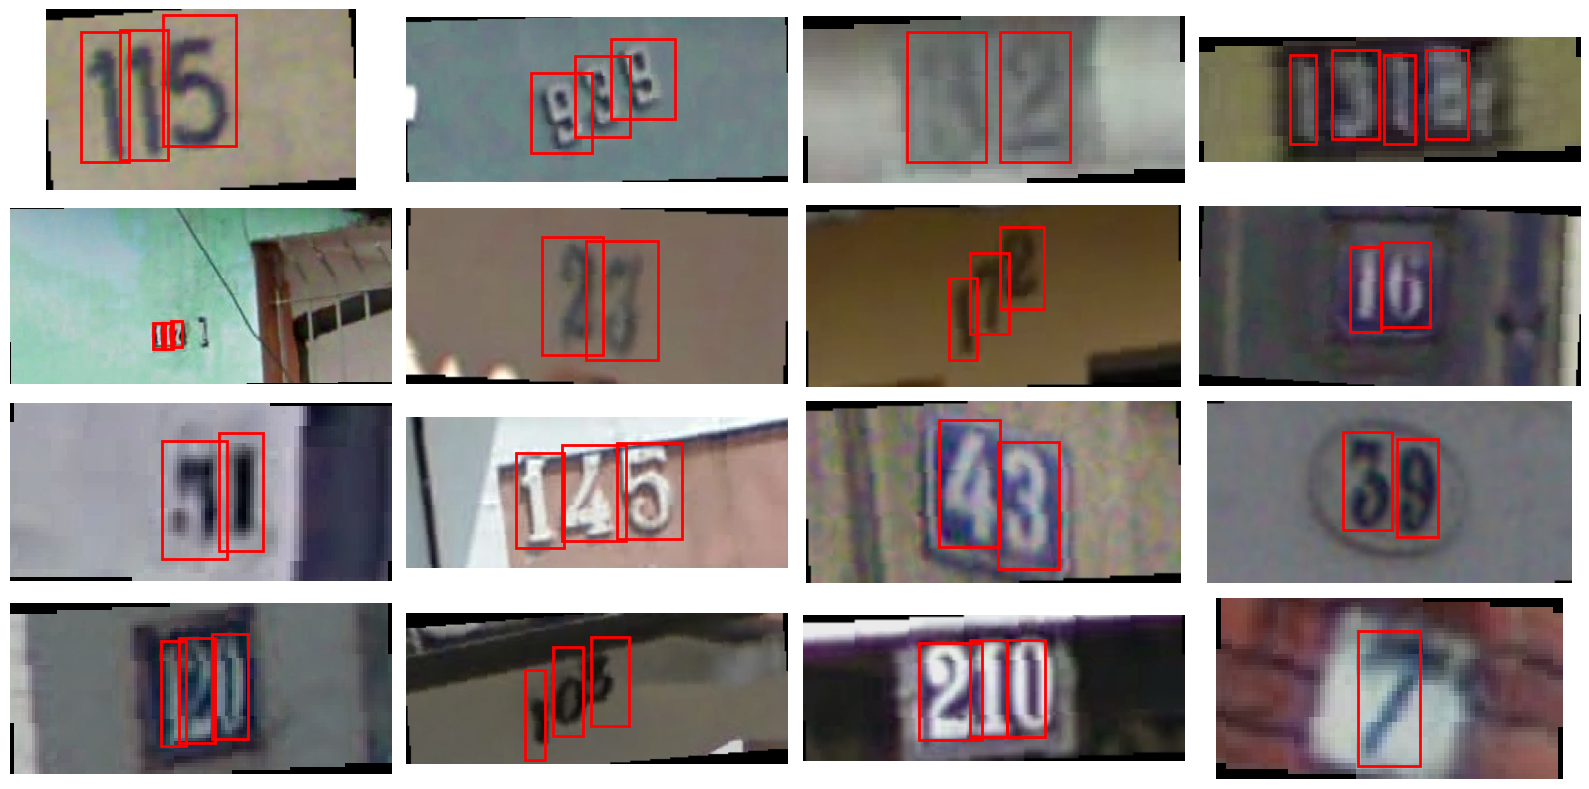

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
from train_inference_cosine_lr_outlier import COCODataset, get_transform

# 建立訓練資料集 (使用 train 時的 augmentation)
train_dataset = COCODataset(
    root='data/train',             # 請依照實際資料路徑修改
    json_file='data/train.json',   # 請依照實際標註檔路徑修改
    transforms=get_transform(train=True)
)

# 一次顯示16張圖片 (4x4 排列)
num_images = 16
fig, axes = plt.subplots(4, 4, figsize=(16, 8))
axes = axes.flatten()  # 將子圖陣列扁平化，方便遍歷

for ax in axes:
    # 隨機取得一筆訓練資料 (augmented image 與 target)
    idx = random.randint(0, len(train_dataset) - 1)
    image, target = train_dataset[idx]
    
    # 將 tensor (C, H, W) 轉換為 numpy 陣列 (H, W, C)
    image_np = image.permute(1, 2, 0).numpy()
    
    # 繪製影像
    ax.imshow(image_np)
    
    # 繪製 bounding box (格式為 [x_min, y_min, x_max, y_max])
    for bbox in target["boxes"]:
        x_min, y_min, x_max, y_max = bbox
        width = x_max - x_min
        height = y_max - y_min
        rect = patches.Rectangle((x_min, y_min), width, height,
                                 linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        
    ax.axis("off")

plt.tight_layout()
plt.show()

